# Sistema de Recomendação - NETFLIX

Fonte do dataset do Kaggle: https://www.kaggle.com/datasets/shivamb/netflix-shows/data

A Netflix é uma plataforma global de streaming que oferece uma vasta coleção de filmes, séries, documentários e produções originais em diversos gêneros. Fundada em 1997 como um serviço de aluguel de DVDs, evoluiu para líder em entretenimento digital, disponível em mais de 190 países, permitindo acesso sob demanda por meio de assinatura mensal.

Iremos explorar alguns gráficos interativos do plotly express para visualizar algumas informações do dataset e criaremos um sistema de recomendação de títulos.

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


# EDA:

In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [6]:
# Tratando os valores NaN.

df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df['duration'] = df['duration'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('0')
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


### Conteúdo por País:

In [7]:
!pip install pycountry
import pycountry

country_freq = df['country'].value_counts().to_frame()
country_freq.columns = ['count']
country_freq = country_freq.drop('Unknown')

# Normalizando os nomes dos países para que o gráfico funcione

def normalize_country_name(country_name):
    try:
        return pycountry.countries.lookup(country_name).name
    except LookupError:
        return None

country_freq.index = country_freq.index.map(normalize_country_name)
country_freq.dropna(inplace=True)


fig = px.choropleth(country_freq, color='count',
                    locations=country_freq.index,
                    hover_name=country_freq.index,
                    color_continuous_scale=px.colors.sequential.Plasma,
                    locationmode='country names')
fig.update_traces(marker=dict(line=dict(color='black', width=1)))
fig.update_layout(title_text='Número de conteúdo por país',
                  title_x=0.5, title_font=dict(size=22))
fig.show()

Os EUA e a Índia lideram o catálogo em produções.

### Análise dos Ratings (Classificação Indicativa):

In [9]:
rating_freq = df['rating'].value_counts().to_frame()
rating_freq.columns = ['count']
rating_freq = rating_freq.reset_index()
rating_freq.rename(columns={'index': 'rating'}, inplace=True)


fig2 = px.treemap(rating_freq, path=['rating'],
                  values='count',
                  color='count')
fig2.update_traces(marker=dict(line=dict(color='#000000', width=1.5)))
fig2.update_layout(title_text='Distribuição das Cassificações Indicativas',
                   title_x=0.5, title_font=dict(size=22),
                   margin=dict(t=50, l=25, r=25, b=25))
fig2.show()

Temos mais conteúdos Mature (Adulto) e adolescentes do que conteúdos infantis.

### Tipos de Conteúdo:

In [100]:
type_freq = df['type'].value_counts().to_frame()
type_freq.columns = ['count']
type_freq = type_freq.reset_index()
type_freq.rename(columns={'index': 'type'}, inplace=True)

fig3 = px.funnel(type_freq, x='count', y='type')
fig3.update_layout(title_text='Tipos de Conteúdo')
fig3.show()

A Netflix possui mais filmes do que séries em seu catálogo segundo nosso dataset.

### Word Count das Categorias:

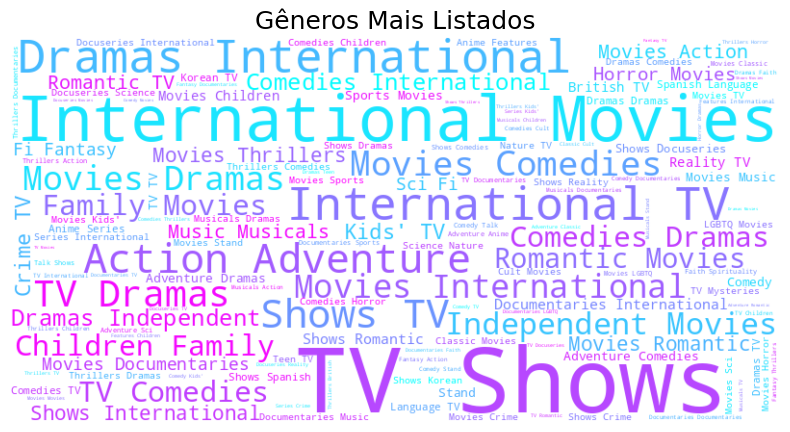

In [90]:
from wordcloud import WordCloud, STOPWORDS
text = " ".join(str(x) for x in df['listed_in'])
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stopwords, colormap='cool',
                      max_words=200, contour_color='black').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Categorias Mais Listados", fontsize=18)
plt.show()

TV Shows e filmes internacionais lideram as categorias.

# Sistema de Recomendação

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combinação das colunas relevantes para encontrar similaridade
df['content'] = df['title'] + ' ' + df['listed_in'] + ' ' + df['description']

# Transformando em vetores de palavras
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['content'])

# Calculando a similaridade entre os títulos
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Função para recomendar
def get_recommendations(title, cosine_sim=cosine_sim):
    # Pegando o índice do título
    idx = df[df['title'].str.contains(title, case=False)].index[0]

    # Pegando as similaridades
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Ordenando pela maior similaridade
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Pegando os 5 mais similares (excluindo o próprio filme)
    sim_scores = sim_scores[1:6]

    # Retornando os títulos correspondentes
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

In [11]:
print(get_recommendations('Breaking Bad'))

3428      El Camino: A Breaking Bad Movie
5129                  El Camino Christmas
3748                       El desconocido
6775    Footprints: The Path of Your Life
4750                             El Chapo
Name: title, dtype: object


In [12]:
print(get_recommendations('Peaky Blinders'))

8293                   The Fear
3503            Criminal: Spain
2606            Extracurricular
8334    The Great Train Robbery
1991               Criminal: UK
Name: title, dtype: object


In [13]:
print(get_recommendations('Orange Is The New Black'))

3600                            GLOW
4845            Arrested Development
6579                            Dean
6321    Black & Privileged: Volume 1
1059                  House of Cards
Name: title, dtype: object


In [14]:
print(get_recommendations('Scream'))

3655                     Typewriter
880                         Haunted
7962                       Scream 3
2108                         Goedam
1277    Two Sentence Horror Stories
Name: title, dtype: object
